#  Классификация изображений с помощью сверточных нейронных сетей

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html#convolution-layers
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://kozodoi.me/blog/20210308/compute-image-stats
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html

## Задачи для совместного разбора

1\. Рассмотрите основные возможности по созданию датасетов из `torchvision` и примеры работы основных слоев для создания сверточных нейронных сетей для анализа изображений.

In [ ]:
from torchvision.datasets import CIFAR10
import torchvision.transforms.v2 as T

In [ ]:
transform = T.Compose(
    [
    T.ToTensor(),
    T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

dataset = CIFAR10(
    root="./tmp",
    train=True,
    download=True,
    transform=transform
)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


100%|██████████| 170498071/170498071 [00:01<00:00, 101108090.64it/s]


Extracting ./tmp/cifar-10-python.tar.gz to ./tmp


In [ ]:
x = dataset[0][0]

In [ ]:
# import matplotlib.pyplot as plt

# plt.imshow(dataset[0][0])

In [ ]:
# image folder

2\. Реализуйте типовую архитектуру CNN для классификации изображений.

In [ ]:
import torch
import torch.nn as nn

In [ ]:
x.shape # channels, h, w

torch.Size([3, 32, 32])

In [ ]:
conv = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3) # кернел - размер квалратика которым пробегаются

In [ ]:
b = x.unsqueeze(0)
b.shape # batch, channels, h, w

torch.Size([1, 3, 32, 32])

In [ ]:
o = conv(b)
o.shape

torch.Size([1, 5, 30, 30])

In [ ]:
pool = nn.MaxPool2d(kernel_size=2) # четный небольшой

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 3)
    self.pool1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(6, 12, 3)
    self.pool2 = nn.MaxPool2d(kernel_size=2)

    self.fc = nn.Linear(in_features=12*6*6, out_features=10)

  def forward(self, X):
    # feature extraction
    out = self.conv1(X)
    out = out.relu()
    out = self.pool1(out)
    out = self.conv2(out)
    out = out.relu()
    out = self.pool2(out) # b x 12 x 6 x 6

    out = torch.flatten(out, start_dim=1) # b x 12*6*6
    out = self.fc(out)
    return out

In [ ]:
net = ConvNet()
o = net(b)
o.shape

torch.Size([1, 10])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Используя преобразования `torchvision`, приведите картинки к размеру 300х300 и нормализуйте значения интенсивности пикселей (рассчитайте статистику для нормализации отдельно). Выведите на экран количество картинок в датасете,  размер одной картинки, количество уникальных классов. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

- [ ] Проверено на семинаре

In [1]:
!wget 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/oHw1WSPwrb9ubw'

--2023-10-23 09:48:28--  https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/oHw1WSPwrb9ubw
Resolving getfile.dokpub.com (getfile.dokpub.com)... 142.132.255.217
Connecting to getfile.dokpub.com (getfile.dokpub.com)|142.132.255.217|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://downloader.disk.yandex.ru/disk/25f9e4bc110ad343f506a952188d2a10b2bef35bd88b84205fc66440c23064b8/653679ad/0oFllvTGFfdpIBeA8vFr8SHgeTsMkF_XYKJk_5F9Hkck6vuSfIkGqWw0kAY64UYkYIGLoeyPXZlhSRlJEOBjyQ%3D%3D?uid=0&filename=cat_breeds_4.zip&disposition=attachment&hash=9eQ1tj3CYiwPSoVInxZ69JVo4Rntd3Od7X3snHglIibPn31XkinpdxNoJ2DfAoZeq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=application%2Fzip&owner_uid=982420194&fsize=68706960&hid=7856e8faaab749eccad8c80b9aba7b5d&media_type=compressed&tknv=v2 [following]
--2023-10-23 09:48:29--  https://downloader.disk.yandex.ru/disk/25f9e4bc110ad343f506a952188d2a10b2bef35bd88b84205fc66440c23064b8/653679ad/0oFllvTGFfdpIBeA8vFr8SHgeT

In [ ]:
from zipfile import ZipFile

with ZipFile('oHw1WSPwrb9ubw') as zip:
  ZipFile.extractall(zip)

In [ ]:
from torchvision.datasets import ImageFolder
import torchvision.transforms.v2 as T
from torch.utils.data import DataLoader

In [ ]:
transform = T.Compose(
    [
      T.Resize((300, 300)),
      T.ToTensor()
    ]
)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [ ]:
CatBreeds = ImageFolder(
    'cat_breeds_4',
    transform=transform)

In [ ]:
torch.manual_seed(42)

In [ ]:
train_dataset, test_dataset = torch.utils.data.random_split(
    CatBreeds, [0.8, 0.2]
    )

In [ ]:
image_loader = DataLoader(
                          train_dataset,
                          batch_size  = 800
                          )

In [ ]:
from tqdm import tqdm
psum    = torch.tensor([0.0, 0.0, 0.0])
psum_sq = torch.tensor([0.0, 0.0, 0.0])

for inputs in tqdm(image_loader):
    psum    += inputs[0].sum(axis        = [0, 2, 3])
    psum_sq += (inputs[0] ** 2).sum(axis = [0, 2, 3])

100%|██████████| 4/4 [00:17<00:00,  4.32s/it]


In [ ]:
image_size = 300
count = len(train_dataset) * image_size * image_size

# mean and std
total_mean = psum / count
total_var  = (psum_sq / count) - (total_mean ** 2)
total_std  = torch.sqrt(total_var)

# output
print('mean: '  + str(total_mean))
print('std:  '  + str(total_std))

mean: tensor([0.5015, 0.4530, 0.4085])
std:  tensor([0.2640, 0.2581, 0.2572])


In [ ]:
transform_norm = T.Compose([
    T.Resize((300, 300)),
    T.ToTensor(),
    T.Normalize(total_mean, total_std)
])

In [ ]:
CatBreeds = ImageFolder(
    'cat_breeds_4',
    transform=transform)

In [ ]:
print('Количество картинок в датасете:', len(CatBreeds))
print('Размер одной картинки:', CatBreeds[0][0].shape)
print('Количество уникальных классов:', len(set(CatBreeds.classes)))

Количество картинок в датасете: 4000
Размер одной картинки: torch.Size([3, 300, 300])
Количество уникальных классов: 4


<p class="task" id="2"></p>

2\. Решите задачу классификации на основе датасета из предыдущего задания, не используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели.   

- [ ] Проверено на семинаре

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

In [ ]:
# transform_norm = T.Compose([
#     T.Resize((300, 300)),
#     T.ToTensor(),
#     T.Normalize(means, stds)
# ])

# image_loader = DataLoader(
#                           torch.utils.data.random_split(
#                           ImageFolder(
#                               'cat_breeds_4',
#                           transform=transform_norm),
#                           [0.8, 0.2]
#                           )[0],
#                           batch_size  = 250
#                 )
# image_loader_test = DataLoader(
#                           torch.utils.data.random_split(
#                           ImageFolder(
#                               'cat_breeds_4',
#                           transform=transform_norm),
#                           [0.8, 0.2]
#                           )[1],
#                           batch_size  = 800
#                           )

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features=3*300*300, out_features=1000),
    nn.ReLU(),
    nn.Linear(in_features=1000, out_features=4)
)

In [ ]:
image_loader_test = DataLoader(
                          test_dataset,
                          batch_size  = len(test_dataset)
                          )

In [ ]:
n_epochs = 10
gamma = 0.01
crit = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=gamma)
accuracy_train, accuracy_test = [], []
loss_list = []

for epoch in range(n_epochs):
  L = 0
  acc = 0
  for (X_, y_) in image_loader:
    X_ = torch.flatten(X_, start_dim=1)
    y_pred = model(X_)
    loss = crit(y_pred, y_)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    L += loss / 800
    y_pred = torch.argmax(y_pred, axis=1)
    acc += (y_pred == y_).sum().item()
  loss_list.append(L.item())
  accuracy_train.append(acc/3200)
  for X_test, y_test in image_loader_test:
    y_pred_test = torch.argmax(
        model(
            torch.flatten(X_test, start_dim=1)),
            axis=1
        )
    acc_test = accuracy_score(y_test, y_pred_test)
  accuracy_test.append(acc_test)

  print(f"epoch={epoch}, loss={L}")

epoch=0, loss=0.01995060406625271
epoch=1, loss=0.007212469354271889
epoch=2, loss=0.006918907165527344
epoch=3, loss=0.006877762731164694
epoch=4, loss=0.006824799347668886
epoch=5, loss=0.006824732292443514
epoch=6, loss=0.006811798084527254
epoch=7, loss=0.006752870976924896
epoch=8, loss=0.006753865163773298
epoch=9, loss=0.0067187463864684105


In [ ]:
import matplotlib.pyplot as plt

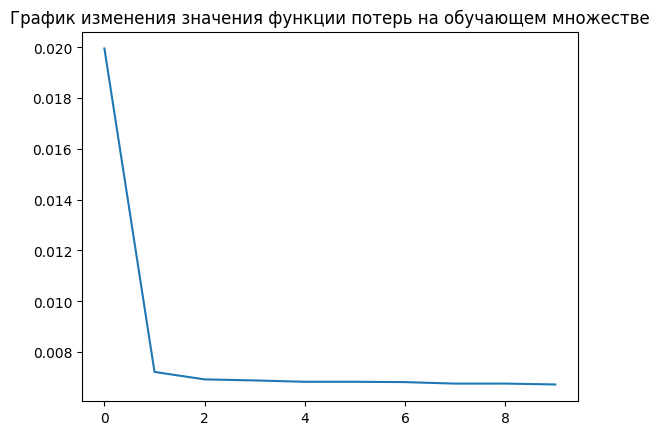

In [ ]:
plt.plot(loss_list)
plt.title('График изменения значения функции потерь на обучающем множестве');

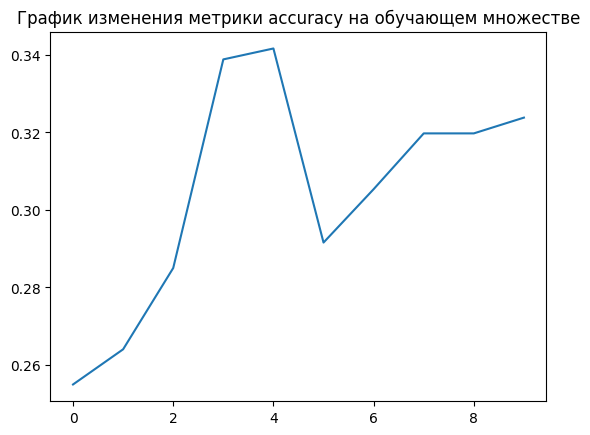

In [ ]:
plt.plot(accuracy_train)
plt.title('График изменения метрики accuracy на обучающем множестве');

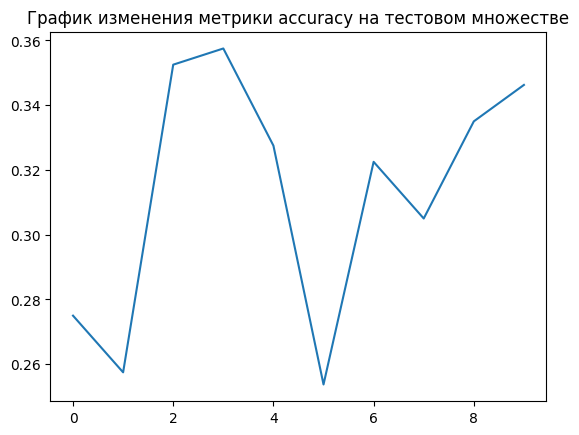

In [ ]:
plt.plot(accuracy_test)
plt.title('График изменения метрики accuracy на тестовом множестве');

In [ ]:
print(f'Итоговое значение метрики accuracy на обучающем множестве = {accuracy_train[-1]}')
print(f'Итоговое значение метрики accuracy на тестовом множестве = {accuracy_test[-1]}')
print(f'Количество параметров модели = {len(list(model.parameters()))}')

Итоговое значение метрики accuracy на обучающем множестве = 0.32375
Итоговое значение метрики accuracy на тестовом множестве = 0.34625
Количество параметров модели = 4


<p class="task" id="3"></p>

3\. Напишите функцию, которая выбирает несколько изображений из переданного набора данных и выводит их на экран в виде сетки с указанием над ними названия правильного класса и класса, предсказанного моделью. Воспользовавшись данной функцией, выведите прогнозы итоговой модели из предыдущей задачи по 6 случайным картинкам.

```
def show_examples(model, dataset, k=6):
    pass
```

- [ ] Проверено на семинаре

In [ ]:
import numpy as np

In [ ]:
def show_examples(model, dataset, k=6):
    chosen_pics = []
    preds = []
    inds = np.random.choice(len(dataset), k, replace=False)
    for i in inds:
        chosen_pics.append(dataset[i])
    for pic in chosen_pics:
        X = pic[0]
        try:
            X = torch.flatten(X)
            y_pred = model(X)
        except RuntimeError:
            y_pred = model(X.view((1, 3, 300, 300)))
        y_pred = torch.argmax(
            y_pred
            )
        preds.append(y_pred.item())
    fig, axs = plt.subplots(nrows=1, ncols=k, figsize=(12, 5))
    for i in range(len(preds)):
        axs[i].imshow(chosen_pics[i][0].permute(1, 2, 0))
        axs[i].set_title(f'y_true={chosen_pics[i][1]},\n y_pred={preds[i]}')

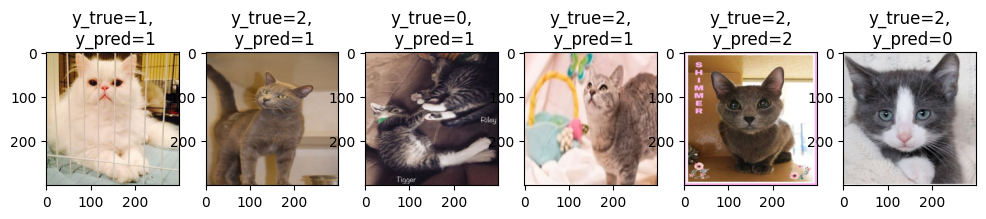

In [ ]:
show_examples(model, train_dataset)

<p class="task" id="4"></p>

4\. Решите задачу классификации на основе датасета из первого задания, используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели. Воспользовавшись функцией из предыдущего задания, выведите прогнозы итоговой модели по 6 случайным картинкам.

- [ ] Проверено на семинаре

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 3)
    self.pool1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(6, 12, 3)
    self.pool2 = nn.MaxPool2d(kernel_size=2)

    self.fc = nn.Linear(in_features=63948, out_features=4)
    #self.fc = nn.Linear(in_features=12*6*6, out_features=10)

  def forward(self, X):
    # feature extraction
    out = self.conv1(X)
    out = out.relu()
    out = self.pool1(out)
    out = self.conv2(out)
    out = out.relu()
    out = self.pool2(out) # b x 12 x 6 x 6

    out = torch.flatten(out, start_dim=1) # b x 12*6*6
    out = self.fc(out)
    return out

In [ ]:
n_epochs = 6
gamma = 0.01
cn = ConvNet()
crit = nn.CrossEntropyLoss()
optimizer = optim.SGD(cn.parameters(), lr=gamma)
accuracy_train, accuracy_test = [], []
loss_list = []

for epoch in range(n_epochs):
  L = 0
  acc = 0
  for (X_, y_) in image_loader:
    #X_ = torch.flatten(X_, start_dim=1)
    y_pred = cn(X_)
    loss = crit(y_pred, y_)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    L += loss / 800
    y_pred = torch.argmax(y_pred, axis=1)
    acc += (y_pred == y_).sum().item()
  loss_list.append(L.item())
  accuracy_train.append(acc/3200)
  for X_test, y_test in image_loader_test:
    y_pred_test = torch.argmax(
        cn(
            X_test
          ),
          axis=1
        )
    acc_test = accuracy_score(y_test, y_pred_test)
  accuracy_test.append(acc_test)

  print(f"epoch={epoch}, loss={L}")

epoch=0, loss=0.023731710389256477
epoch=1, loss=0.021403426304459572
epoch=2, loss=0.02100367844104767
epoch=3, loss=0.020657021552324295
epoch=4, loss=0.020324843004345894
epoch=5, loss=0.020049236714839935


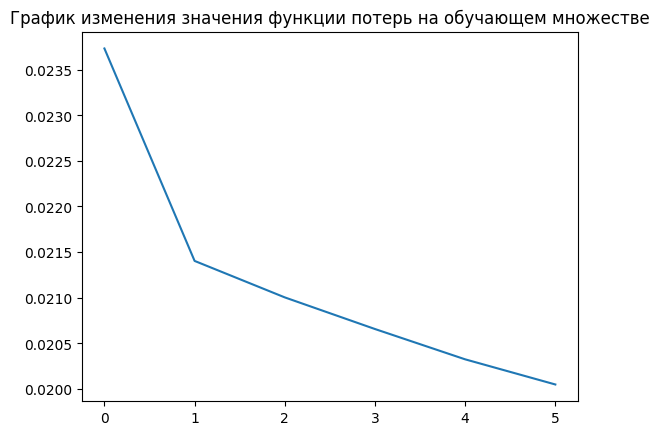

In [ ]:
plt.plot(loss_list)
plt.title('График изменения значения функции потерь на обучающем множестве');

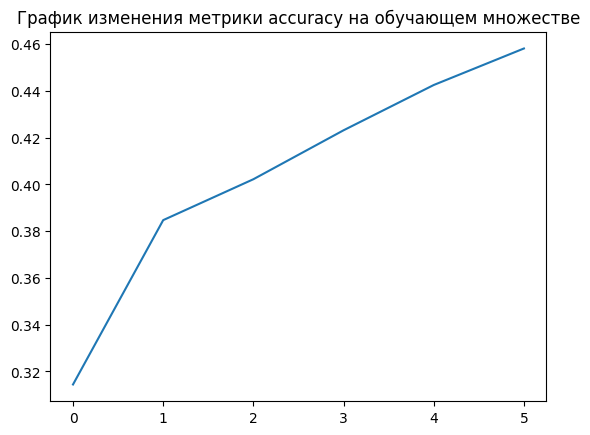

In [ ]:
plt.plot(accuracy_train)
plt.title('График изменения метрики accuracy на обучающем множестве');

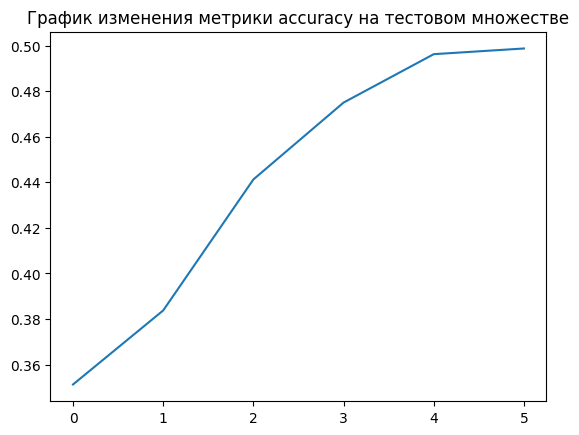

In [ ]:
plt.plot(accuracy_test)
plt.title('График изменения метрики accuracy на тестовом множестве');

In [ ]:
print(f'Итоговое значение метрики accuracy на обучающем множестве = {accuracy_train[-1]}')
print(f'Итоговое значение метрики accuracy на тестовом множестве = {accuracy_test[-1]}')
print(f'Количество параметров модели = {len(list(cn.parameters()))}')

Итоговое значение метрики accuracy на обучающем множестве = 0.458125
Итоговое значение метрики accuracy на тестовом множестве = 0.49875
Количество параметров модели = 6


In [ ]:
import numpy as np

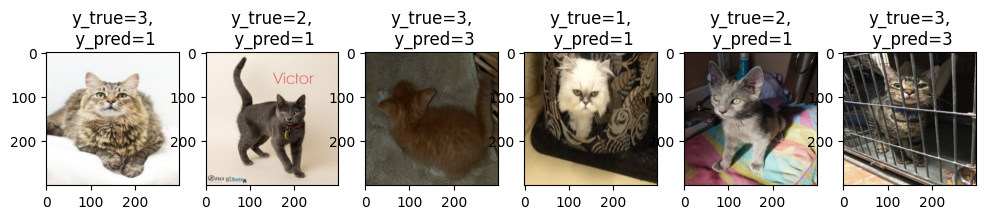

In [ ]:
show_examples(cn, train_dataset)

<p class="task" id="5"></p>

5\. Проанализируйте обученную в предыдущей задаче модель, исследовав обученные ядра сверточных слоев. Выберите одно изображение из тестового набора данных и пропустите через первый сверточный слой модели. Визуализируйте полученные карты признаков.

- [ ] Проверено на семинаре

In [ ]:
pic, label = train_dataset[0]

In [ ]:
out = cn.conv1(pic)

In [ ]:
out.shape

torch.Size([6, 298, 298])

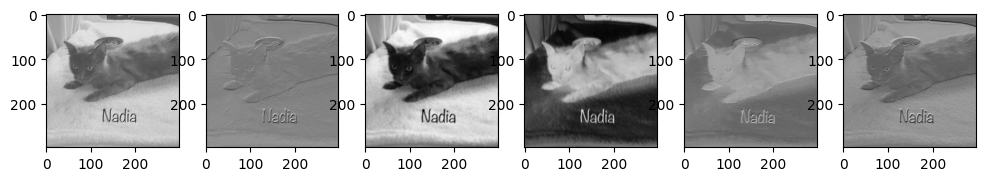

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))
for i in range(6):
    axs[i].imshow(out[i].detach().numpy(), cmap='gray')

## Обратная связь
- [x] Хочу получить обратную связь по решению